## IFT6135 Assignment4, Programming part

Names: Xiao Fan (20086722) ,  Zhibin Lu (20091078)

In [596]:
import time
import os
import importlib

# path = 'C:/Users/lingyu.yue/Documents/Xiao_Fan/GAN'
path="/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4/"
if os.path.isdir(path):
    os.chdir(path)
else:
    os.chdir("./")
print(os.getcwd())

import matplotlib.pyplot as plt
from scipy.misc import imresize
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from torchvision.utils import save_image
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from PIL import Image
import itertools
import inception_score 
import GAN_CelebA
#from GAN_train import loadCheckpoint,generator,generator_Upsampling,discriminator,show_result
importlib.reload(GAN_CelebA)
importlib.reload(inception_score)

use_cuda = torch.cuda.is_available()
torch.manual_seed(999)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(999)


/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4
/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4


In [170]:
img_root = "img_align_celeba/resized_celebA/"
IMAGE_RESIZE = 64
batch_size = 128
use_cuda = torch.cuda.is_available()

data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
dataset = datasets.ImageFolder(root=img_root, transform=data_transform)


## DCGAN (question1-3)
### Deconvolution Generator

==> Resuming from checkpoint..


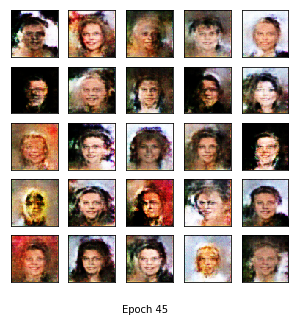

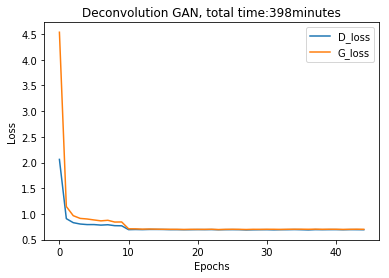

In [556]:
#GANDeconv_t9900_h100_train3_ep48.critic5
#GANDeconv_t9900_h100_train3_ep45
#GANDeconv_t9900_h100_train3_ep21
#GANDeconv_t9900_h100_train3_ep45
filename='GANDeconv_t9900_h100_train3_ep45' #'GANDeconvolution_t2000_h100_ep20.c5'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
# plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Deconvolution GAN, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/'+filename+'_Loss.pdf')
plt.show()

#test_z = torch.randn(10000,100,1,1)
#inception_score(test_z, G, D, batch_size=128, cuda=use_cuda, resize=False, splits=10)

Deconvolution,x=9900,hidden=100,epochs=45,batch_size = 128, Adam lr= 0.0002, train3 function, critic dinamic.

[1/50], loss_D 2.060, loss_G 4.535 - critic 1:4, ptime 317.89s
[2/50], loss_D 0.908, loss_G 1.144 - critic 1:5, ptime 303.80s
[3/50], loss_D 0.830, loss_G 0.965 - critic 2:7, ptime 302.06s
[4/50], loss_D 0.803, loss_G 0.912 - critic 1:4, ptime 301.21s
[5/50], loss_D 0.792, loss_G 0.901 - critic 2:5, ptime 294.55s
[6/50], loss_D 0.792, loss_G 0.882 - critic 2:5, ptime 287.07s
...
[43/50], loss_D 0.694, loss_G 0.700 - critic 1:20, ptime 572.02s
[44/50], loss_D 0.693, loss_G 0.702 - critic 1:13, ptime 634.65s
[45/50], loss_D 0.692, loss_G 0.700 - critic 1:20, ptime 621.54s

We adjust the value of the Critic dynamically during the training. For each minibatch, when fixing the generator and training the discriminator, we want the discriminator's loss, $mean(real\_data\_loss+fake\_data\_loss)<0.69$, which is $E[p]>0.5$ ; similarly when fixing the discriminator, we want the generator to generate The probability of the picture being judged by discriminator, E[p]>0.5. This can make discriminator and generator work together as much as possible. Experiments have found that the effect is good.


==> Resuming from checkpoint..


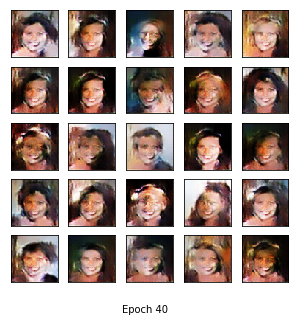

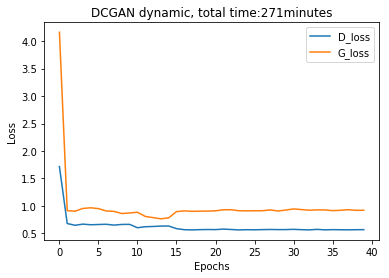

In [557]:
# Dynamic critic of grandiant descent between Distriminator and Generator.
filename='GANDeconvolution_t4000_h100_ep40.cdynamic'
hidden_dim = 100

G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
# plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('DCGAN dynamic, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/'+filename+'_Loss.pdf')
plt.show()

Deconvolution,x=4000,h=100,epoch=40, critic=dynamic($log p<0.55$),batch_size = 128, Adam lr= 0.0008

[7/40], loss_D: 0.666, loss_G: 0.909 - critic: 4:4, ptime: 254.72s
Inception score:  (1.0090563, 0.00050846767)
[8/40], loss_D: 0.652, loss_G: 0.901 - critic: 4:5, ptime: 238.43s
Inception score:  (1.0138602, 0.00037993764)
[9/40], loss_D: 0.664, loss_G: 0.862 - critic: 3:5, ptime: 247.65s
Inception score:  (1.0194101, 0.0005664201)
[10/40], loss_D: 0.665, loss_G: 0.873 - critic: 2:7, ptime: 239.64s
Inception score:  (1.0181569, 0.00089106197)
...
[38/40], loss_D: 0.565, loss_G: 0.932 - critic: 1:10, ptime: 414.31s
Inception score:  (1.0171516, 0.0010196324)
[39/40], loss_D: 0.568, loss_G: 0.920 - critic: 3:10, ptime: 424.99s
Inception score:  (1.0209544, 0.0008667706)
[40/40], loss_D: 0.568, loss_G: 0.922 - critic: 2:10, ptime: 411.39s
Inception score:  (1.0209, 0.00084835745)
Avg per epoch ptime: 377.46s, total 40 epochs ptime: 16278.76s

### Nearest-Neighbor Generator

==> Resuming from checkpoint..


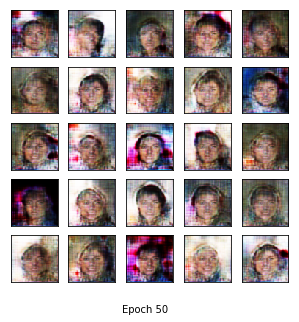

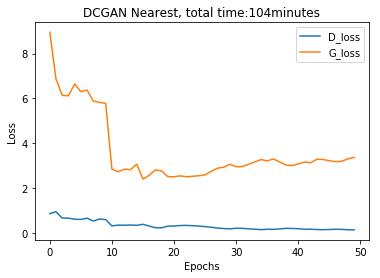

In [598]:
#GANnearest_t9900_h100_train3_ep9
#GANnearest_t10000_h100_ep50_new
filename='GANnearest_t10000_h100_ep50_new' #'GANnearest_t4000_h100_ep30.c1' #'GANnearest_t10000_h100_train2_ep3' #GANnearest_t4000_h100_ep30.c1
hidden_dim = 100

G,D,train_hist = GAN_CelebA.loadCheckpoint_Upsampling(filename,hidden_dim,use_cuda=use_cuda,mode='nearest')
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
# plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('DCGAN Nearest, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/'+filename+'_Loss.pdf')
plt.show()

nearest,x=10000,h=100,epoch=50,critic=1


### Bilinear Upsampling followed by regular convolution

==> Resuming from checkpoint..


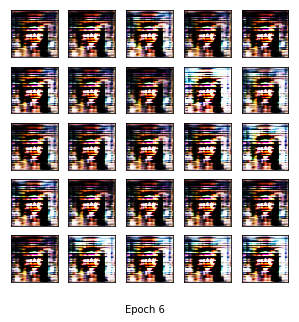

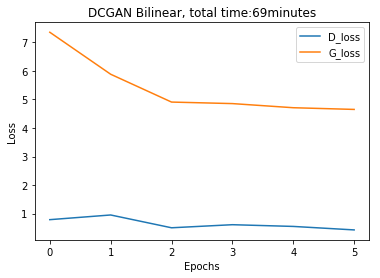

In [559]:
filename = 'GANBilinear_t9900_h100_train3_ep6.critic5'#'GANBilinear_t4000_h100_ep30.c4'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint_Upsampling(filename,hidden_dim,use_cuda=use_cuda,mode='nearest')
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
# plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('DCGAN Bilinear, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/'+filename+'_Loss.pdf')
plt.show()

Bilinear,x=10000, h=100, epoch=50, critic=1


## Wasserstein GAN (question4-5)

==> Resuming from checkpoint..


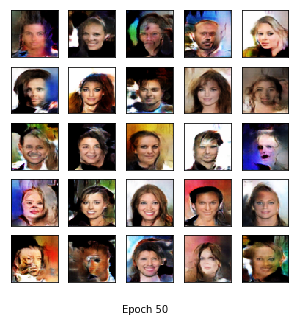

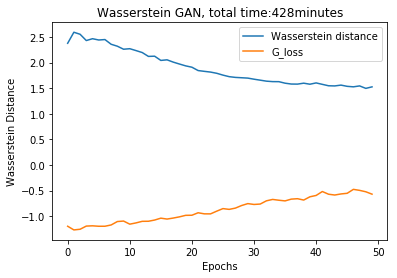

In [537]:
#GAN_W_fixlr_t10000_h100_trainw_ep48
#GAN_W_fixlr_t10000_h100_b64_c5_ep48
filename = 'GAN_W_fixlr_t10000_h100_b64_c5_ep50' #'GAN_W_t1000_h100_trainw_ep9'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint_W(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='Wasserstein distance')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
#plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Wasserstein Distance')
plt.title('Wasserstein GAN, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/'+filename+'_Loss.pdf')
plt.show()

WGAN,x=10000,h=100, batch size=64, discriminator critic=5,RMSprop lr = 0.0002

[1/50], loss_D 2.378, loss_G -1.197 - critic 5:1, ptime 521.01s
[2/50], loss_D 2.594, loss_G -1.269 - critic 5:1, ptime 513.82s
[3/50], loss_D 2.554, loss_G -1.256 - critic 5:1, ptime 514.00s
[4/50], loss_D 2.432, loss_G -1.194 - critic 5:1, ptime 513.83s
[5/50], loss_D 2.468, loss_G -1.189 - critic 5:1, ptime 513.89s
[6/50], loss_D 2.442, loss_G -1.197 - critic 5:1, ptime 513.90s
...
[46/50], loss_D 1.537, loss_G -0.553 - critic 5:1, ptime 513.84s
[47/50], loss_D 1.527, loss_G -0.476 - critic 5:1, ptime 513.81s
[48/50], loss_D 1.545, loss_G -0.496 - critic 5:1, ptime 513.90s
[49/50], loss_D 1.497, loss_G -0.523 - critic 5:1, ptime 513.75s
[50/50], loss_D 1.527, loss_G -0.570 - critic 5:1, ptime 513.89s

1. The dcgan algorithm is very unstable during training. It is often the case that a gradiant descent is too fast. For example, the generator quickly becomes too powerful, causing the discriminator to fail to train, or vice versa. We tried to improve this situation by dynamically controlling the critic parameter.
2. Nearby is more unstable than deconvolution, and bilinear is the hardest to train.

## Qualitative Evaluations 
### question5b
### Increase the dimension of the latent space (for z) to 200 
DCGAN and WGAN

==> Resuming from checkpoint..


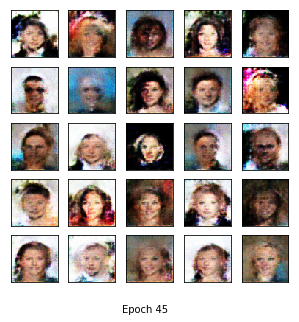

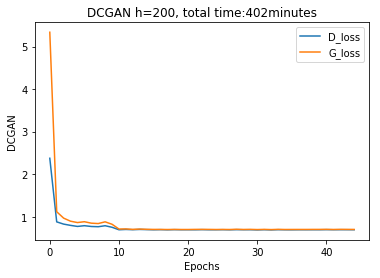

In [539]:
#GANDeconv_t9900_h200_train3_ep45
#GANDeconv_t9900_h200_train3_ep50
filename = 'GANDeconv_t9900_h200_train3_ep45' #'GAN_W_t1000_h100_trainw_ep9'
hidden_dim=200
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
#plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('DCGAN')
plt.title('DCGAN h=200, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/'+filename+'_Loss.pdf')
plt.show()

==> Resuming from checkpoint..


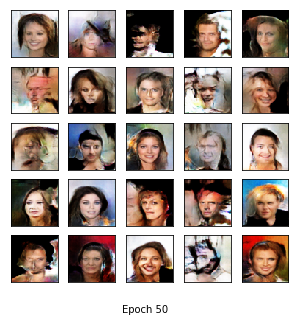

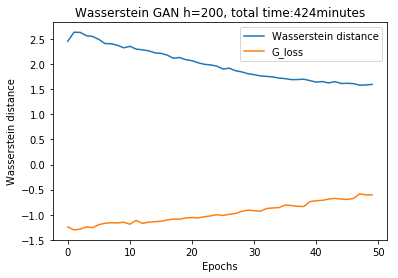

In [552]:
#GAN_W_fixlr_t10000_h200_trainw_ep48
#GAN_W_fixlr_t10000_h200_b64_c5_ep48
filename='GAN_W_fixlr_t10000_h200_b64_c5_ep50' #'GANDeconvolution_t2000_h100_ep20.c5'
hidden_dim=200
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='Wasserstein distance')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
#plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Wasserstein distance')
plt.title('Wasserstein GAN h=200, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/'+filename+'_Loss.pdf')
plt.show()

#test_z = torch.randn(10000,100,1,1)
#inception_score(test_z, G, D, batch_size=128, cuda=use_cuda, resize=False, splits=10)


1. The wgan algorithm is much more stable than the dc algorithm when training.
2. Wgan produces better picture quality.
3. Hidden z dimension=200 is not significantly improved from 100, and both dcgan and wgan are.

## question 5(c)
### Pick two random points z 0 and z 1 in the latent space,compute $z0 = αz0 + (1 − α)z1$

/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4
==> Resuming from checkpoint..


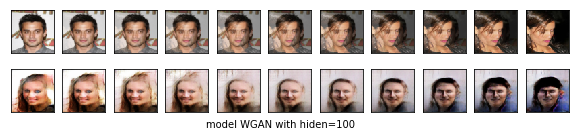

==> Resuming from checkpoint..


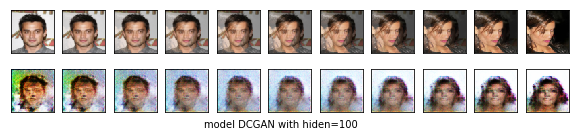

In [554]:
importlib.reload(GAN_CelebA)

x_0 = dataset[3][0]
x_1 = dataset[6][0]

# GAN_W_fixlr_t10000_h100_b64_c5_ep50
#GAN_W_fixlr_t10000_h100_trainw_ep42 #3
filename = 'GAN_W_fixlr_t10000_h100_b64_c5_ep50' #'GAN_W_t1000_h100_trainw_ep9'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint_W(filename,hidden_dim,use_cuda=use_cuda)
GAN_CelebA.compareRandomPoint(x_0,x_1,G,23, hidden_dim, show = True, save = True, \
            path = 'figures/compare2point_wgan.pdf',use_cuda=use_cuda,label='model WGAN with hiden='+str(hidden_dim))

filename='GANDeconv_t9900_h100_train3_ep45'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
GAN_CelebA.compareRandomPoint(x_0,x_1,G,5, hidden_dim, show = True, save = True, \
            path = 'figures/compare2point_dcgan.pdf',use_cuda=use_cuda,label='model DCGAN with hiden='+str(hidden_dim))


The first line is the superposition of the linear operation of the real two pictures, and the second line is the picture generated after the linear operation of two points z.
We observe that the real two pictures are a superposition process. Using generator-generated images is a gradual process. For example, the direction of z0's face slowly changes to the direction of z1's face; z0's hair color gradually changes to z1's hair color. The wgan-generated images are more natural in the gradient.

## Quantitative Evaluations (GAN) (question 6)

In [416]:
importlib.reload(GAN_CelebA)
importlib.reload(inception_score)

filename = 'GAN_W_fixlr_t10000_h100_trainw_ep48' #'GAN_W_t1000_h100_trainw_ep9'
hidden_dim=100
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])

test_z = torch.randn(50,hidden_dim,1,1)
score=inception_score.inception_score(test_z, G, batch_size=32, cuda=use_cuda, resize=True, splits=10)
print('inception score: ',score)


# plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
# plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
# #plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
# plt.xlabel('Epochs')
# plt.ylabel('DCGAN')
# plt.title('DCGAN h=200, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
# plt.legend()
# plt.show()

/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4
==> Resuming from checkpoint..


/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4/inception_score.py:143: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


inception score:  (1.6422559933366863, 0.19988817181603402)


In [593]:
importlib.reload(GAN_CelebA)
importlib.reload(inception_score)

filename = 'GAN_W_fixlr_t10000_h100_trainw_ep48' #'GAN_W_t1000_h100_trainw_ep9'
hidden_dim=100
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])

test_z = torch.randn(1000,hidden_dim,1,1)
score=inception_score.Wasserstein_distance(dataset,test_z, G, D, batch_size=32, cuda=use_cuda)
print('Wasserstein distance: ',score)

/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/assignment4
==> Resuming from checkpoint..
Wasserstein distance:  0.19800723


## TEST

==> Resuming from checkpoint..


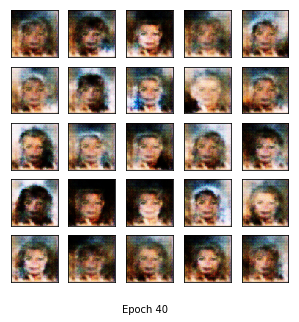

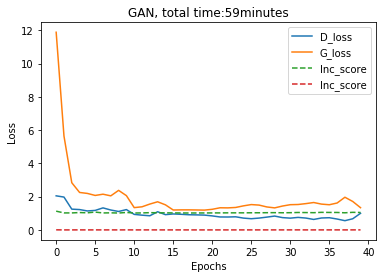

In [561]:
filename='GANDeconvolution_t4000_h100_ep40.c1'
hidden_dim = 100
G,D,train_hist = GAN_CelebA.loadCheckpoint(filename,hidden_dim,use_cuda=use_cuda)
epoch_num=len(train_hist['D_losses'])
GAN_CelebA.show_result(G,D,epoch_num, hidden_dim, show=True,save=True, path='figures/test_'+filename+'.pdf', use_cuda=use_cuda)

plt.plot(range(0,epoch_num),train_hist['D_losses'],label='D_loss')
plt.plot(range(0,epoch_num),train_hist['G_losses'],label='G_loss')
plt.plot(range(0,epoch_num),train_hist['Inc_score'],linestyle='--',label='Inc_score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GAN, total time:'+str(int(train_hist['total_ptime'][-1]/60))+'minutes')
plt.legend()
plt.savefig('figures/test_'+filename+'_Loss.pdf')
plt.show()

### Compare 3 method for increase/double the feature map size:

image size :  torch.Size([3, 64, 64])


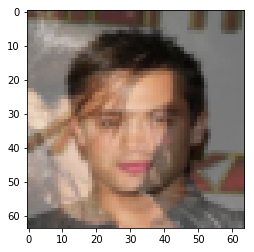

In [200]:
x = dataset[3][0]
print ("image size : ", x.size())
# plt.imshow((x.numpy().transpose(1, 2, 0)*0.5 +0.5))

x_0 = dataset[3][0]
x_1 = dataset[6][0]
x_prime=torch.zeros(11,3,64,64)
for n in range(0,11):
    x_prime[n]=n*0.1*x_0+(1-n*0.1)*x_1
    
plt.imshow((x_prime[5].numpy().transpose(1, 2, 0)*0.5 +0.5))

Deconvolution : torch.Size([3, 128, 128])


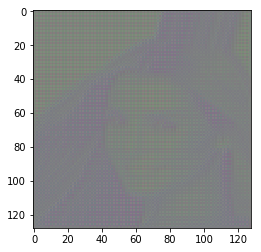

In [23]:
x = dataset[0][0]
x = Variable(x.view(1,3,64,64))
deconv = nn.ConvTranspose2d(3, 3, 4, 2, 1)
deconv.weight.data.normal_(mean=0.0, std=0.02)
deconv.bias.data.zero_()
deconv_x = deconv(x).squeeze(0)
print ('Deconvolution :' , deconv_x.size())
plt.imshow((deconv_x.data.numpy().transpose(1, 2, 0) + 1) / 2)

image size :  torch.Size([3, 64, 64])
deconv_x size :  torch.Size([3, 64, 64])
nearest_x size :  torch.Size([3, 64, 64])
bilinear_x size :  torch.Size([3, 64, 64])


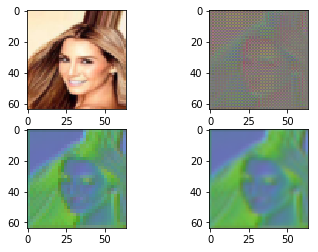

In [28]:

x = dataset[0][0]

print ("image size : ", x.size())
plt.subplot(2,2,1)
plt.imshow((x.numpy().transpose(1, 2, 0) + 1) / 2)

x = Variable(x.view(1,3,64,64))
conv = nn.Conv2d(3,10,4,2,1)
conv_x = conv(x) # (batch,10,32,32)

# Deconvolution (transposed convolution) with paddings and strides.
deconv = nn.ConvTranspose2d(10,3,4,2,1)
#deconv.weight.data.normal_(mean=0.0, std=0.05)
#deconv.bias.data.zero_()

deconv_x = deconv(conv_x).squeeze(0)
print ("deconv_x size : ", deconv_x.size())
plt.subplot(2,2,2)
plt.imshow((deconv_x.data.numpy().transpose(1, 2, 0) + 1) / 2)

# Nearest-Neighbor Upsampling followed by regular convolution.
plt.subplot(2,2,3)
upsampling_nearest = nn.Upsample(scale_factor=2,mode='nearest')
conv2 = nn.Conv2d(10, 3, 1, 1, 0)
upsampling_nearest_x = conv2(upsampling_nearest(conv_x)).squeeze(0)
print ("nearest_x size : ", upsampling_nearest_x.size())
plt.imshow((upsampling_nearest_x.data.numpy().transpose(1, 2, 0) + 1) / 2)

# Bilinear Upsampling followed by regular convolution
plt.subplot(2,2,4)
upsampling_bilinear = nn.Upsample(scale_factor=2,mode='bilinear')
upsampling_bilinear_x = conv2(upsampling_bilinear(conv_x)).squeeze(0)
print ("bilinear_x size : ", upsampling_bilinear_x.size())
plt.imshow((upsampling_bilinear_x.data.numpy().transpose(1, 2, 0) + 1) / 2)
# plt.savefig('/Users/fanxiao/Google Drive/UdeM/IFT6135 Representation Learning/homework4/figures/faces.pdf')
plt.savefig('faces.pdf')